Intro to Tensorflow
---

Import tensorflow and other needed libraries here:

In [99]:
# TODO: Add imports.
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline

Clear the Graph
---
Clear the default graph to reset everything back to default

In [100]:
# TODO: Clear the tensorflow graph
tf.reset_default_graph()
    
test_constant = tf.constant(10.0, dtype=tf.float32)
add_one_operation = test_constant + 1

TypeError: 'Tensor' object is not callable

Set up Placeholders
---
Placeholders are places you can feed data into your model. They indicate a value that you'll feed in later when the network is run.

In [101]:
# TODO: Create placeholders
tf.reset_default_graph()

input_data = tf.placeholder(dtype=tf.float32, shape=None, 2)

double_operation = input_data * 2

SyntaxError: positional argument follows keyword argument (<ipython-input-101-123fd1d773a8>, line 4)

Variables
---
Variables keep their value between runs. These are the building blocks of machine learning, and represent the parameters that will be tuned as your model trains

In [102]:
# TODO: Create variables
tf.reset_default_graph()

input_data = tf.placeholder(dtype=tf.float32, shape=None)
output_data = tf.placeholder(dtype=tf.float32, shape=None)

slope = tf.Variable(0.5, dtype=tf.float32)
intercept = tf.Variable(0.1, dtype=tf.float32)

model_operation = slope * input_data + intercept

error = model_operation - output_data
squared_error = tf.square(error)
loss = tf.reduce_mean(squared_error)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
train = optimizer.minimize(loss)

Running a Session
---
Once your graph is built, you can start a session. Putting the session in a `with` statement allows the session to automatically close once the statement finishes:
```
with tf.Session() as sess:
    # Run the session in here
    ...
# Session closes when you get here
```

2.40721e-07


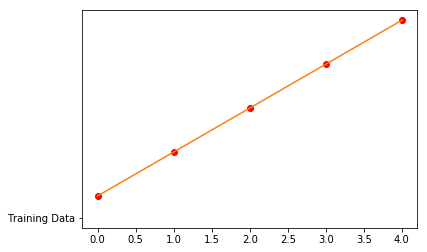

In [111]:
# TODO: Run a session

init = tf.global_variables_initializer()
 
x_values = [0, 1, 2, 3, 4]
y_values = [1, 3, 5, 7, 9]
 
with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train, feed_dict={input_data:x_values, output_data: y_values})
        if 1 % 10 == 0:
            print(sess.run([slope, intercept]))
            plt.plot(x_values, sess.run(model_operation, feed_dict={input_data: x_values}))
    print(sess.run(loss, feed_dict={input_data: x_values, output_data: y_values}))
    plt.plot(x_values, y_values, 'ro', 'Training Data')
    plt.plot(x_values, sess.run(model_operation, feed_dict={input_data: x_values}))
    plt.show()

Neurons and Neural Networks
---
Tensorflow provides functions to easily create layers of neurons for a neural network.